In [1]:
#libraries for Data Scraping
from bs4 import BeautifulSoup 
import requests
import pandas as pd
from IPython.display import clear_output
import datetime 
import numpy as np


In [2]:
from scipy.stats import rankdata, hmean, norm
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter 
from textblob import TextBlob
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer
#visualization
from IPython.display import display,HTML,IFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import base64
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
sns.set()

In [3]:
list=[]
for page in range(1, 50, 1):
    try:
        url = "https://www.ramseysolutions.com/articles?page=" + str(page)
        r=requests.get(url)
        soup=BeautifulSoup(r.content, "lxml")
        st=soup.find_all("article", attrs={"class" : "rds-Card_1" })
        for i in st:
         link=i.a.get("href")
         print(link)
         r1=requests.get(link)
         #we got our link
         soup2=BeautifulSoup(r1.content, "lxml")
         text=soup2.find("section", attrs={"class" : "u-spacingStack6" }).find('div').text.strip().replace("/n"," ").replace("\n", "").replace("\xa0", " ")
         print(text) 
         title=soup2.find("section", attrs={"class" : "u-spacingStack6" }).find('h2').text
         print(title)
         time=soup2.find("div", attrs={"class" : "rs-Hero-articleInfo" }).find('p').text.replace("\n", "")
         print(time)
         topic=soup2.find("div", attrs={"class" : "u-spacingBlockMd" }).find('a').text
         print(topic)
         list.append([link,title,text, topic, time])
    except AttributeError:
        print("There's no item with that code")

#we scraped the data we wanted to get and collected it in our array.
#Since we encountered attribute errors before, we added it to the try except block.

https://www.ramseysolutions.com/insurance/sondra-and-scotts-story

Life Insurance Calculator 
              1 Min Read | Oct 10, 2024            
Insurance
https://www.ramseysolutions.com/insurance/Medicare-Enrollment-Explained
Dear Medicare,    Could you please be more complicated?    Sincerely,    No one at all.    The rules, options and dates around Medicare are crazy! Especially enrollment. But it’s important to know this stuff. Seriously, understanding and getting enrollment right is super important because if you get it wrong, you could end up paying penalties the rest of your life. Yeah, the stakes are that high!    So we’re going to do our best to make it simple (and introduce you to some folks who can help guide you beyond this article.)
Eligibility for Medicare
              15 Min Read | Oct 9, 2024            
Insurance
https://www.ramseysolutions.com/career-advice/tell-me-about-yourself
Key Takeaways  “Tell me about yourself” is a common interview question that you can ans

In [4]:
df=pd.DataFrame(list)
#converting to dataframe
df

0  \
0    https://www.ramseysolutions.com/insurance/sond...   
1    https://www.ramseysolutions.com/insurance/Medi...   
2    https://www.ramseysolutions.com/career-advice/...   
3    https://www.ramseysolutions.com/career-advice/...   
4    https://www.ramseysolutions.com/budgeting/how-...   
..                                                 ...   
436  https://www.ramseysolutions.com/retirement/4-q...   
437  https://www.ramseysolutions.com/debt/student-l...   
438  https://www.ramseysolutions.com/budgeting/how-...   
439  https://www.ramseysolutions.com/taxes/american...   
440  https://www.ramseysolutions.com/taxes/ev-tax-c...   

                                                     1  \
0                           Life Insurance Calculator    
1                             Eligibility for Medicare   
2    Why Do Interviewers Always Ask, “Tell Me About...   
3                             What Is Micromanagement?   
4                  Money-Saving Tips to Beat Inflation   
..                                                 ...   
436  Question 1: As a group, are my mutual funds ou...   
437                      What Is Student Loan Default?   
438                          8 Steps to Wrap a Present   
439  What Is the American Opportunity Tax Credit (A...   
440           What Is the Electric Vehicle Tax Credit?   

                                                     2           3  \
0                                                        Insurance   
1    Dear Medicare,    Could you please be more com...   Insurance   
2    Key Takeaways  “Tell me about yourself” is a c...      Career   
3    Key Takeaways  Micromanagement is a leadership...      Career   
4    Inflation. It’s the headline in every news sto...   Budgeting   
..                                                 ...         ...   
436  Maybe you’re the kind of person who likes to p...  Retirement   
437  Taking out student loans to pay for college se...        Debt   
438  If you’re like me, you’re probably already won...   Budgeting   
439  If you or one of your kiddos are going to coll...       Taxes   
440  Thinking of going electric? You’re not alone. ...       Taxes   

                                                     4  
0                  1 Min Read | Oct 10, 2024       ...  
1                  15 Min Read | Oct 9, 2024       ...  
2                  10 Min Read | Oct 8, 2024       ...  
3                  6 Min Read | Oct 8, 2024        ...  
4                  9 Min Read | Oct 4, 2024        ...  
..                                                 ...  
436                6 Min Read | Jul 11, 2024       ...  
437                8 Min Read | Nov 8, 2023        ...  
438                10 Min Read | Nov 10, 2023      ...  
439                11 Min Read | Nov 15, 2023      ...  
440                15 Min Read | Nov 7, 2023       ...  

[441 rows x 5 columns]

In [5]:
df.columns=["link", "title", "text", "topic", "time-stamp"]
df

link  \
0    https://www.ramseysolutions.com/insurance/sond...   
1    https://www.ramseysolutions.com/insurance/Medi...   
2    https://www.ramseysolutions.com/career-advice/...   
3    https://www.ramseysolutions.com/career-advice/...   
4    https://www.ramseysolutions.com/budgeting/how-...   
..                                                 ...   
436  https://www.ramseysolutions.com/retirement/4-q...   
437  https://www.ramseysolutions.com/debt/student-l...   
438  https://www.ramseysolutions.com/budgeting/how-...   
439  https://www.ramseysolutions.com/taxes/american...   
440  https://www.ramseysolutions.com/taxes/ev-tax-c...   

                                                 title  \
0                           Life Insurance Calculator    
1                             Eligibility for Medicare   
2    Why Do Interviewers Always Ask, “Tell Me About...   
3                             What Is Micromanagement?   
4                  Money-Saving Tips to Beat Inflation   
..                                                 ...   
436  Question 1: As a group, are my mutual funds ou...   
437                      What Is Student Loan Default?   
438                          8 Steps to Wrap a Present   
439  What Is the American Opportunity Tax Credit (A...   
440           What Is the Electric Vehicle Tax Credit?   

                                                  text       topic  \
0                                                        Insurance   
1    Dear Medicare,    Could you please be more com...   Insurance   
2    Key Takeaways  “Tell me about yourself” is a c...      Career   
3    Key Takeaways  Micromanagement is a leadership...      Career   
4    Inflation. It’s the headline in every news sto...   Budgeting   
..                                                 ...         ...   
436  Maybe you’re the kind of person who likes to p...  Retirement   
437  Taking out student loans to pay for college se...        Debt   
438  If you’re like me, you’re probably already won...   Budgeting   
439  If you or one of your kiddos are going to coll...       Taxes   
440  Thinking of going electric? You’re not alone. ...       Taxes   

                                            time-stamp  
0                  1 Min Read | Oct 10, 2024       ...  
1                  15 Min Read | Oct 9, 2024       ...  
2                  10 Min Read | Oct 8, 2024       ...  
3                  6 Min Read | Oct 8, 2024        ...  
4                  9 Min Read | Oct 4, 2024        ...  
..                                                 ...  
436                6 Min Read | Jul 11, 2024       ...  
437                8 Min Read | Nov 8, 2023        ...  
438                10 Min Read | Nov 10, 2023      ...  
439                11 Min Read | Nov 15, 2023      ...  
440                15 Min Read | Nov 7, 2023       ...  

[441 rows x 5 columns]

In [6]:
df_excel = pd.read_excel('news.xlsx')
df_excel.head()

Unnamed: 0                                               link  \
0           0  https://www.ramseysolutions.com/insurance/sond...   
1           1  https://www.ramseysolutions.com/insurance/Medi...   
2           2  https://www.ramseysolutions.com/career-advice/...   
3           3  https://www.ramseysolutions.com/career-advice/...   
4           4  https://www.ramseysolutions.com/budgeting/how-...   

                                               title  \
0                         Life Insurance Calculator    
1                           Eligibility for Medicare   
2  Why Do Interviewers Always Ask, “Tell Me About...   
3                           What Is Micromanagement?   
4                Money-Saving Tips to Beat Inflation   

                                                text      topic  \
0                                                NaN  Insurance   
1  Dear Medicare,    Could you please be more com...  Insurance   
2  Key Takeaways  “Tell me about yourself” is a c...     Career   
3  Key Takeaways  Micromanagement is a leadership...     Career   
4  Inflation. It’s the headline in every news sto...  Budgeting   

                                          time-stamp  
0                1 Min Read | Oct 10, 2024       ...  
1                15 Min Read | Oct 9, 2024       ...  
2                10 Min Read | Oct 8, 2024       ...  
3                6 Min Read | Oct 8, 2024        ...  
4                9 Min Read | Oct 4, 2024        ...

In [7]:
print(df_excel.isnull().sum())
#checking for null values

Unnamed: 0    0
link          0
title         1
text          1
topic         0
time-stamp    0
dtype: int64


In [8]:
data=df_excel.dropna()

In [9]:
data["topic"].value_counts()

topic
Retirement            83
Home Buying           69
Taxes                 64
Budgeting             60
Business              39
Debt                  31
Insurance             21
Career                17
Personal Growth       15
Saving                14
Home Selling           9
Relationships          6
Banking                6
Research               2
Financial Literacy     2
Trending               1
Name: count, dtype: int64

In [10]:
data = data.drop(data[data['topic'] == 'Trending'].index)

In [11]:
data["topic"].value_counts()
#So far, we have deleted the trending topic because we cannot work with data that has a single value.

topic
Retirement            83
Home Buying           69
Taxes                 64
Budgeting             60
Business              39
Debt                  31
Insurance             21
Career                17
Personal Growth       15
Saving                14
Home Selling           9
Relationships          6
Banking                6
Research               2
Financial Literacy     2
Name: count, dtype: int64

In [12]:
data

Unnamed: 0                                               link  \
1             1  https://www.ramseysolutions.com/insurance/Medi...   
2             2  https://www.ramseysolutions.com/career-advice/...   
3             3  https://www.ramseysolutions.com/career-advice/...   
4             4  https://www.ramseysolutions.com/budgeting/how-...   
6             6  https://www.ramseysolutions.com/insurance/what...   
..          ...                                                ...   
436         436  https://www.ramseysolutions.com/retirement/4-q...   
437         437  https://www.ramseysolutions.com/debt/student-l...   
438         438  https://www.ramseysolutions.com/budgeting/how-...   
439         439  https://www.ramseysolutions.com/taxes/american...   
440         440  https://www.ramseysolutions.com/taxes/ev-tax-c...   

                                                 title  \
1                             Eligibility for Medicare   
2    Why Do Interviewers Always Ask, “Tell Me About...   
3                             What Is Micromanagement?   
4                  Money-Saving Tips to Beat Inflation   
6                               Understanding Medicare   
..                                                 ...   
436  Question 1: As a group, are my mutual funds ou...   
437                      What Is Student Loan Default?   
438                          8 Steps to Wrap a Present   
439  What Is the American Opportunity Tax Credit (A...   
440           What Is the Electric Vehicle Tax Credit?   

                                                  text       topic  \
1    Dear Medicare,    Could you please be more com...   Insurance   
2    Key Takeaways  “Tell me about yourself” is a c...      Career   
3    Key Takeaways  Micromanagement is a leadership...      Career   
4    Inflation. It’s the headline in every news sto...   Budgeting   
6    You know when you have leftovers from a fancy ...   Insurance   
..                                                 ...         ...   
436  Maybe you’re the kind of person who likes to p...  Retirement   
437  Taking out student loans to pay for college se...        Debt   
438  If you’re like me, you’re probably already won...   Budgeting   
439  If you or one of your kiddos are going to coll...       Taxes   
440  Thinking of going electric? You’re not alone. ...       Taxes   

                                            time-stamp  
1                  15 Min Read | Oct 9, 2024       ...  
2                  10 Min Read | Oct 8, 2024       ...  
3                  6 Min Read | Oct 8, 2024        ...  
4                  9 Min Read | Oct 4, 2024        ...  
6                  16 Min Read | Oct 9, 2024       ...  
..                                                 ...  
436                6 Min Read | Jul 11, 2024       ...  
437                8 Min Read | Nov 8, 2023        ...  
438                10 Min Read | Nov 10, 2023      ...  
439                11 Min Read | Nov 15, 2023      ...  
440                15 Min Read | Nov 7, 2023       ...  

[438 rows x 6 columns]

In [13]:
data['polarity'] = data['text'].map(lambda text: TextBlob(text).sentiment.polarity)
data['letter_length'] = data['text'].astype(str).apply(len)
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

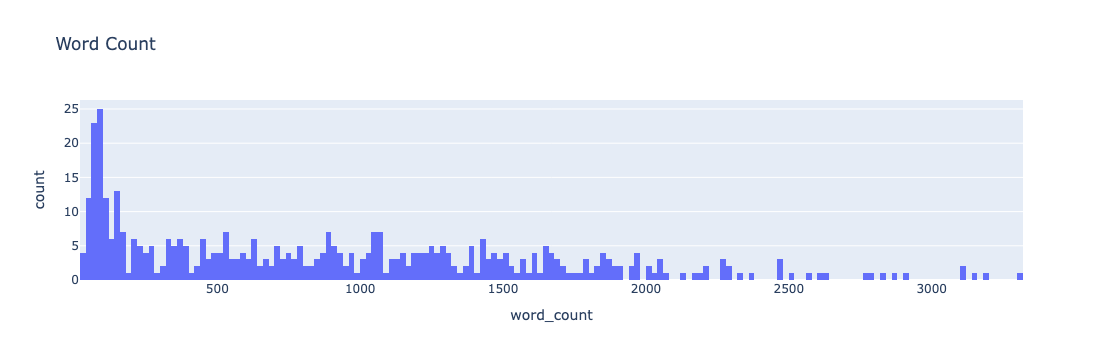

In [14]:
fig = px.histogram(data, x="word_count", nbins=200, title='Word Count')
fig.show()
#word counts histogram graph 


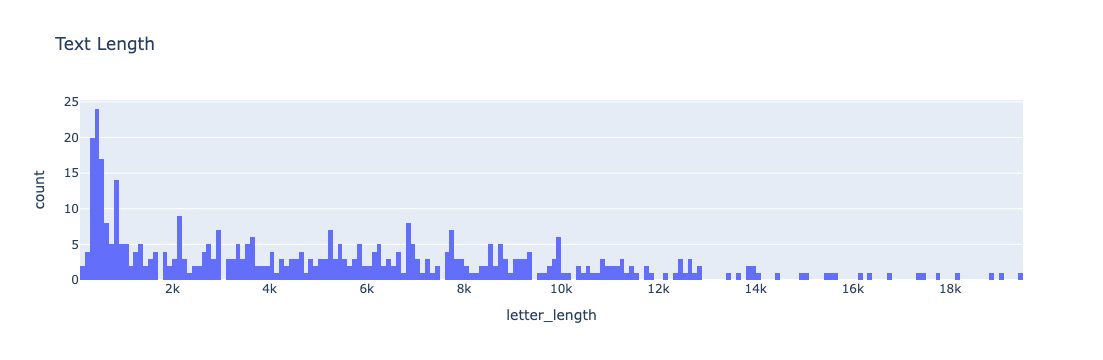

In [15]:
fig = px.histogram(data, x="letter_length", nbins=200, title='Text Length')
fig.show()
#letter length histogram graph


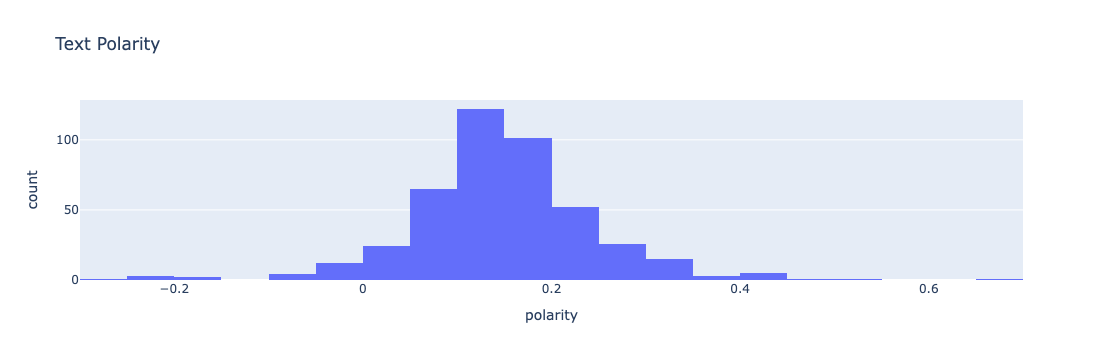

In [16]:
fig = px.histogram(data, x="polarity", nbins=20, title='Text Polarity')
fig.show()
#polarity length histogram graph


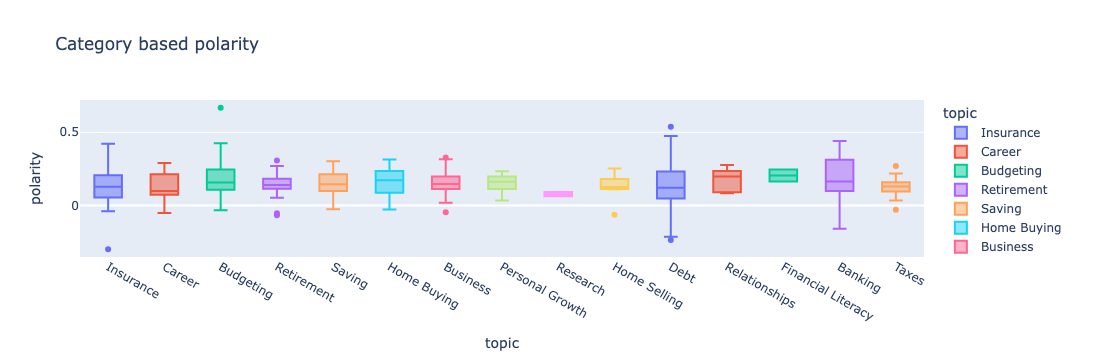

In [17]:
fig = px.box(data, x="topic",y='polarity', color="topic",
             title="Category based polarity ",
             hover_data=["polarity"])
fig.show()
#Category based polarity graph


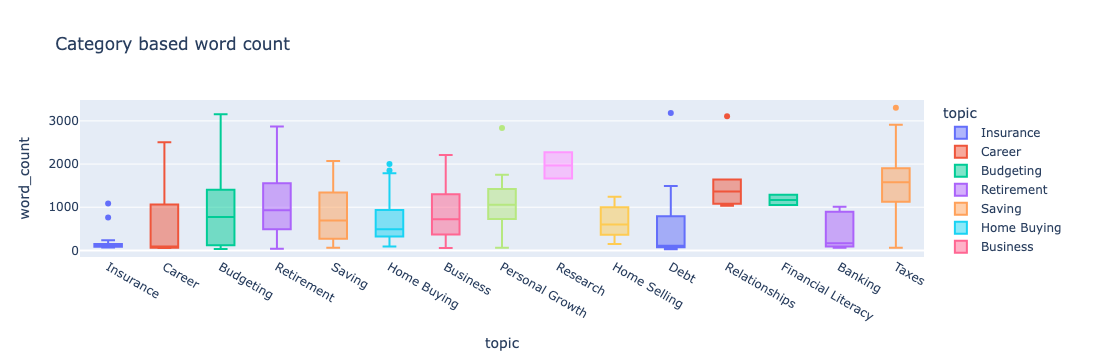

In [18]:
fig = px.box(data, x="topic",y='word_count', color="topic",
             title="Category based word count",
             hover_data=["polarity"])
fig.show()
#Category based word count graph


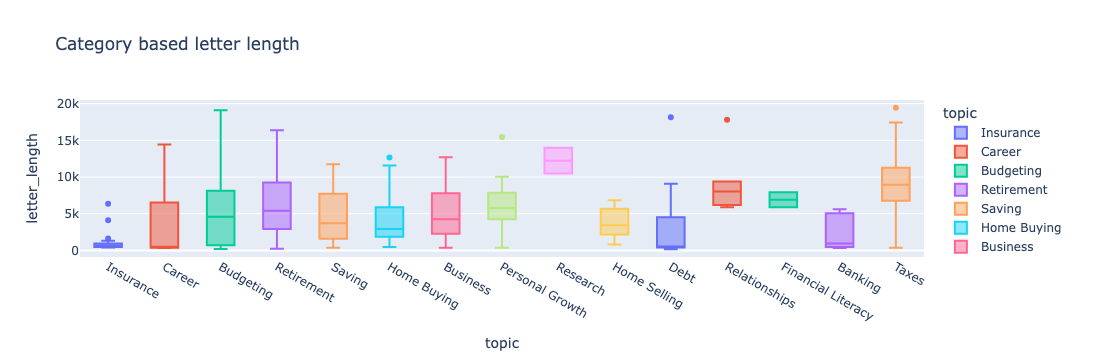

In [19]:

fig = px.box(data, x="topic",y='letter_length', color="topic",
             title="Category based letter length",
             hover_data=["polarity"])
fig.show()
#Category based letter length graph

In [20]:
#We visualized our data and analyzed general situations.
#We will continue our analysis with stopwords.

In [21]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
#We imported our stopword file to work in our code.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/niluferaltinoluk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


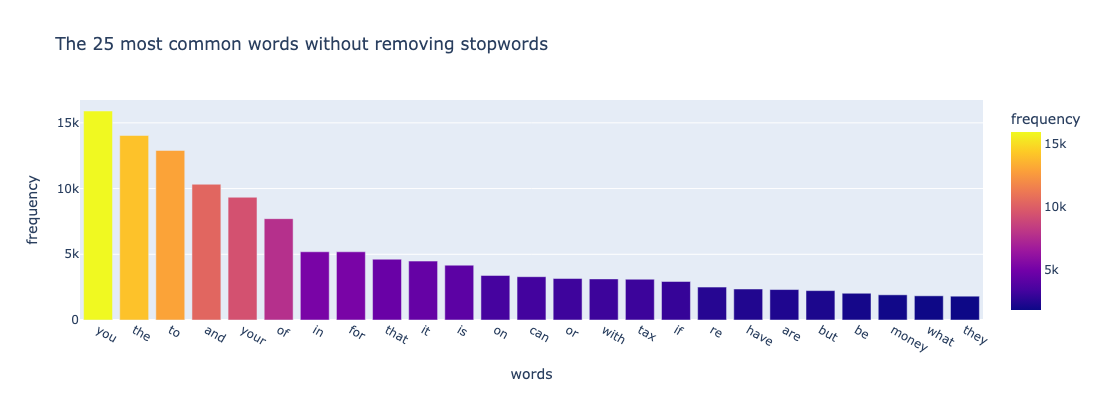

In [22]:

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['text'], 25)
df1 = pd.DataFrame(common_words, columns = ['words' , 'frequency'])
fig = px.bar(df1, x='words', y='frequency',
             hover_data=['words', 'frequency'], color='frequency',
             title='The 25 most common words without removing stopwords',
             height=400)
fig.show()
#The 25 most common words without removing stopwords in our texts graph

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:408: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['com', 'html', 'http', 'lextek', 'list', 'manuals', 'onix', 'size', 'stopwords', 'stopwords1', 'txt', 'www'] not in stop_words.



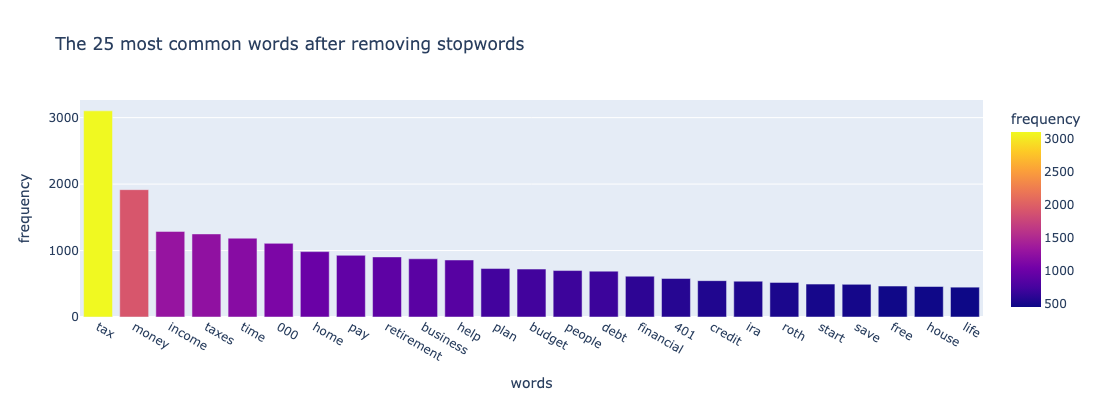

In [23]:

stop = stopwords.words('english')
with open('stopwords.txt', encoding='utf-8') as file:  
    stw = file.read() 
stw = stw.split()
stw = [s.lower() for s in stw] 
stop += stw
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['text'], 25)
df2 = pd.DataFrame(common_words, columns = ['words' , 'frequency'])
fig = px.bar(df2, x='words', y='frequency',
             hover_data=['words', 'frequency'], color='frequency',
             title='The 25 most common words after removing stopwords',
             height=400)
fig.show()
#The 25 most common words after removing stopwords in our texts graph

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:408: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['com', 'html', 'http', 'lextek', 'list', 'manuals', 'onix', 'size', 'stopwords', 'stopwords1', 'txt', 'www'] not in stop_words.



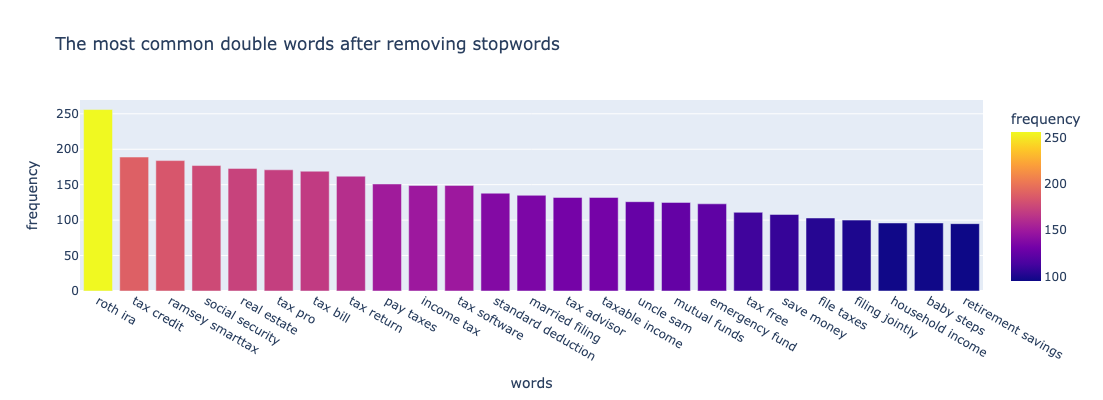

In [24]:

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(data['text'], 25)
df3 = pd.DataFrame(common_words, columns = ['words' , 'frequency'])
fig = px.bar(df3, x='words', y='frequency',
             hover_data=['words', 'frequency'], color='frequency',
             title='The most common double words after removing stopwords',
             height=400)
fig.show()
#The most common double words after removing stopwords in our texts graph

In [25]:
text_data = data[['text','topic']]
text_data.head()
#We created our text data

text      topic
1  Dear Medicare,    Could you please be more com...  Insurance
2  Key Takeaways  “Tell me about yourself” is a c...     Career
3  Key Takeaways  Micromanagement is a leadership...     Career
4  Inflation. It’s the headline in every news sto...  Budgeting
6  You know when you have leftovers from a fancy ...  Insurance

<Axes: xlabel='topic'>

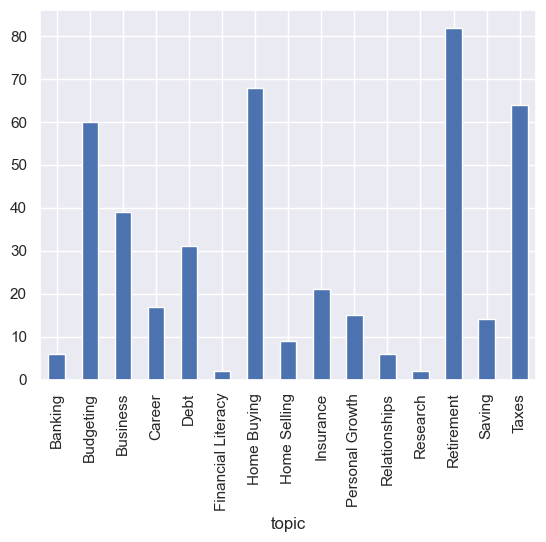

In [26]:
data.groupby('topic')['text'].nunique().plot.bar()



In [27]:
#First of all, we create a corpus covering all texts to fit the TF-IDF algorithm.
corpus = []
for i in range(len(data)):
    corpus.append(text_data.iloc[i,0])

In [28]:
# We fit the TF-IDF model with Corpus
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

TfidfVectorizer()

In [29]:
X = vectorizer.transform(corpus).toarray()
y = text_data.topic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=39, stratify=y)
##Here I divide it into 2: 25%-75%. Stratify=y ensures that the y ratio in the train and test is the same.

In [31]:
rf = RandomForestClassifier(class_weight='balanced_subsample')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


                 precision    recall  f1-score   support

        Banking       0.00      0.00      0.00         2
      Budgeting       0.50      0.93      0.65        15
       Business       1.00      0.90      0.95        10
         Career       1.00      0.25      0.40         4
           Debt       0.75      0.38      0.50         8
    Home Buying       0.81      1.00      0.89        17
   Home Selling       0.00      0.00      0.00         2
      Insurance       1.00      0.80      0.89         5
Personal Growth       0.67      0.50      0.57         4
  Relationships       0.00      0.00      0.00         2
     Retirement       0.84      1.00      0.91        21
         Saving       0.00      0.00      0.00         4
          Taxes       0.93      0.88      0.90        16

       accuracy                           0.77       110
      macro avg       0.58      0.51      0.51       110
   weighted avg       0.74      0.77      0.73       110

0.7727272727272727
[[ 0  1  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [32]:
#It matches topics with correct texts with an accuracy rate of 77 percent